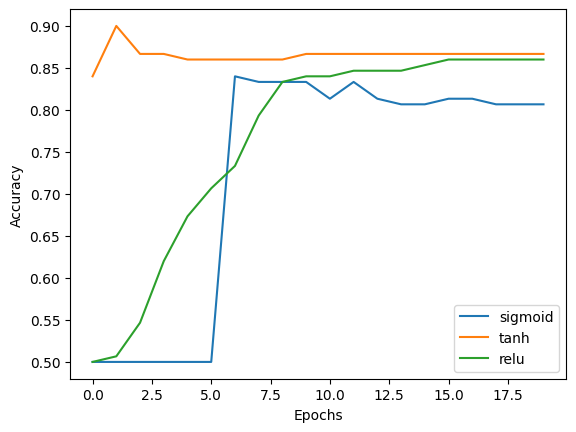

In [2]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

# Dataset
X, y = make_moons(500, noise=0.1, random_state=42)
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train models with different activations
activations = ['sigmoid', 'tanh', 'relu']
histories = {}
for act in activations:
    model = Sequential([Dense(16, activation=act, input_dim=2),
                         Dense(8, activation=act),
                         Dense(1, activation='sigmoid')])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    histories[act] = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=20, verbose=0).history

# Plot validation accuracy
for act in activations:
    plt.plot(histories[act]['val_accuracy'], label=act)
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()